# Data Visualization with matplotlib
We will use the package `matplotlib`.
```
import matplotlib.pyplot as plt
```
- line plot
    - linear plot
    - log plot
- level set plot
- color plot
- vector field plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Line Plot

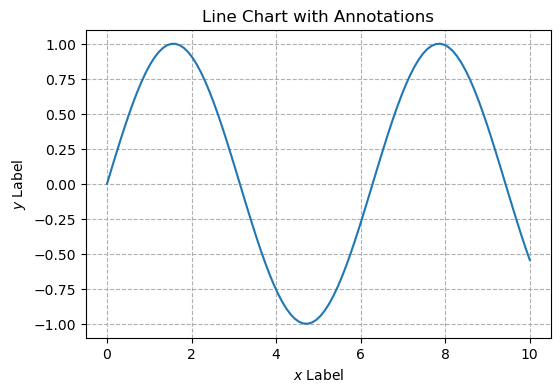

In [2]:
# you first plot 
x = np.linspace(0,10,100)
plt.figure(figsize=(6, 4),dpi=100)
plt.plot(x,np.sin(x))

# Add title and labels
plt.title('Line Chart with Annotations')
plt.xlabel('$x$ Label')
plt.ylabel('$y$ Label')

# Display grid
plt.grid(True,linestyle='dashed')

# Show the plot
plt.show()

Exercise 1
Plot a $\tanh(x)$ and $\mathrm{sech}(x)$ in the same figure.
Some hints
```
plt.plot(x,np.tanh(x),label='tanh')  # Add a label for the legend
plt.plot(x,1/np.cosh(x),label='sech')  # Add a label for the legend
plt.legend()
```

![ex1 plot](ex1.png)


If the quantities span several orders of magnitude, it is preferable to use a log plot or a semilog plot.

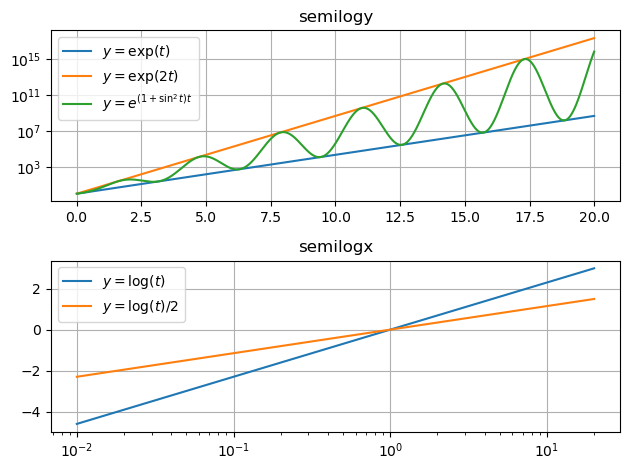

In [3]:
# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Log y-axis plot
ax1.semilogy(t, np.exp(t),label='$y=\exp(t)$')
ax1.semilogy(t, np.exp(2*t),label='$y=\exp(2t)$')
ax1.semilogy(t, np.exp((1+np.sin(t)**2)*t),label='$y=e^{(1+\sin^2t)t}$')
ax1.set(title='semilogy')
ax1.grid()
ax1.legend()
# Log x-axis plot
#ax2.plot(t, np.sin(np.exp(t/5)),label='$y = \sin(e^{t/5})$')
ax2.semilogx(t, np.log(t),label='$y = \log(t)$')
ax2.semilogx(t, np.log(t)/2,label='$y = \log(t)/2$')

ax2.set(title='semilogx')
ax2.legend()
ax2.grid()

fig.tight_layout()
plt.show()

Exercise 2 Plot Gamma function $\Gamma(x)$ for $x \in (0.1,10)$.

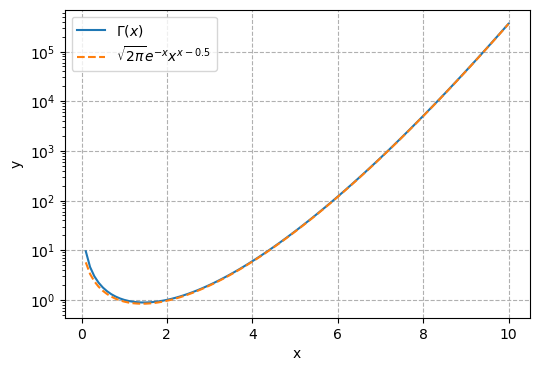

In [5]:
from scipy.special import gamma
x = np.linspace(0.1,10,100)
plt.figure(figsize=(6, 4),dpi=100)
plt.semilogy(x, gamma(x),label='$\Gamma(x)$')
plt.semilogy(x, np.sqrt(2*np.pi)*x**(x-0.5)*np.exp(-x),linestyle='dashed',label='$\sqrt{2\pi}e^{-x}x^{x-0.5}$')
#plt.semilogy(x,gamma(x)-np.sqrt(2*np.pi)*x**(x-0.5)*np.exp(-x))
plt.legend()
# Display grid
plt.grid(True,linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Level Set and Color Plot

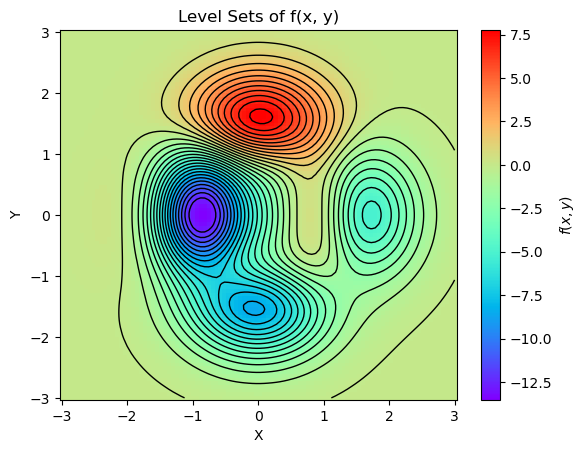

In [6]:
# Create a function (you can replace this with your own function)
#def f(x, y):


def f(x, y):
    term1 = -10 * (x**5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term2 = -13 * np.exp(-(x + 1)**2 - y**2)
    
    z = term1 + term2 
    return z

# Generate data for x and y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)


# Compute the function values
Z = f(X, Y)
# Create a filled contour plot
plt.contour(X,Y,Z,linewidths=1,colors='black',levels=np.linspace(-12.5,7.5,30),linestyles='solid')
plt.pcolormesh(X,Y,Z,cmap="rainbow")
plt.colorbar(label=r'$f(x,y)$')


# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Level Sets of f(x, y)')
#plt.xlim([-3,3])
#plt.ylim([-3,3])
# Show the plot
fig.tight_layout()
plt.show()


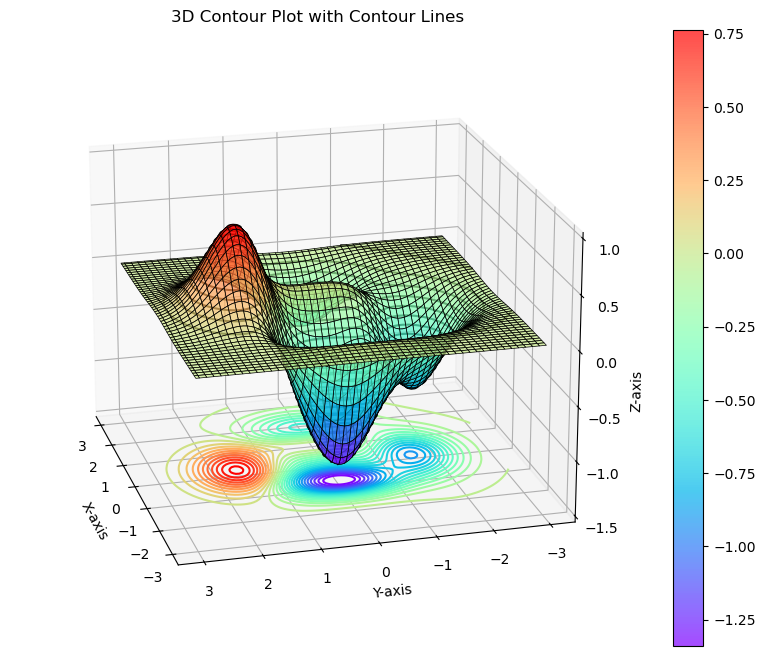

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def f(x, y):
    term1 = -10 * (x**5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term2 = -13 * np.exp(-(x + 1)**2 - y**2)
    
    z = term1 + term2 
    return 0.1 * z

# Generate data for x and y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
# Creating a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot( projection='3d')

# Plotting the 3D contour
surf = ax.plot_surface(X, Y, Z, cmap='rainbow',alpha=0.7, edgecolors='k', lw=0.5)

ax.contour3D(X, Y, Z, colors='black',levels=np.linspace(-1.25,.75,30),linestyles='solid')

ax.contour(X, Y, Z, zdir='z', offset=np.min(Z)-0.15, cmap='rainbow',levels=np.linspace(-1.25,.75,30), linestyles='solid')

ax.set_zlim([-1.5,1])
# Customizing the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Contour Plot with Contour Lines')
fig.colorbar(surf)

# view angle
ax.view_init(elev=20, azim=165)

# Displaying the plot
plt.show()


Exercise 3 Plot level sets and color of $ f(x,y) = e^{-x^2 - 2 y^2} + e^{-2 (x-1)^2 -  (y-1)^2}$ for $x \in (-2,2)$ and $y \in (-2,2)$ 

## Plot Vector Fields

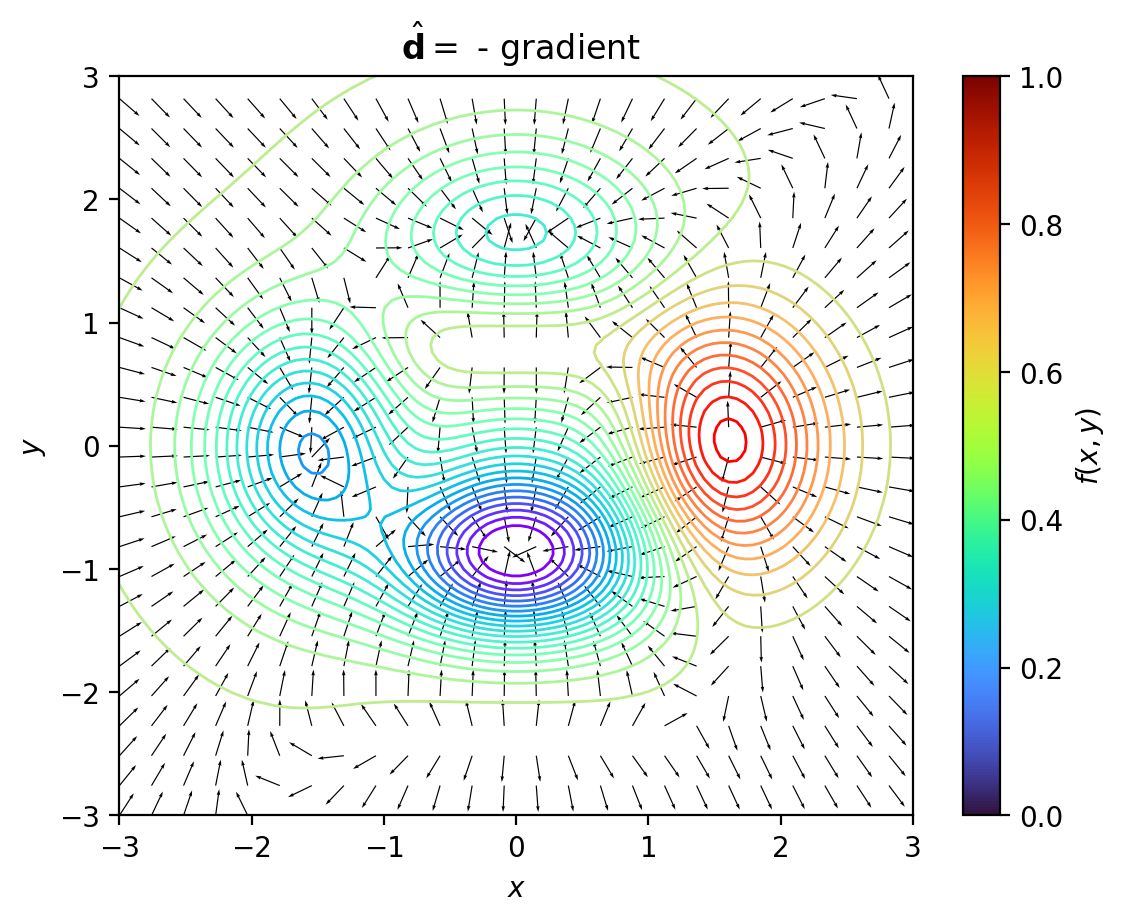

In [174]:
# Ref: https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html
def f(x, y):
    term1 = -10 * (x**5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term2 = -13 * np.exp(-(x + 1)**2 - y**2)
    
    z = term1 + term2 
    return 0.1 * z

# Generate data for x and y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
dx = 6/100
dy = 6/100

grad =  np.gradient(Z,dx,dy)
plt.figure(dpi=200)
#plt.subplot(2,1,1)
skip = (slice(None, None, 4), slice(None, None, 4)) ## make a sparse plot

gx = grad[0].transpose()**1 
gy = grad[1].transpose()**1
gnorm = np.sqrt(gx**2 + gy**2) 
dir_x = - gx / gnorm
dir_y = - gy / gnorm

color = np.sqrt((gx[skip])**2 + (gy[skip])**2)



plt.contour(X,Y,Z.transpose(),linewidths=1,cmap='rainbow',levels=np.linspace(-1.25,.75,30))

plt.quiver(X[skip],Y[skip], dir_x[skip], dir_y[skip],cmap=plt.cm.turbo,width= 0.0015,scale=30)

plt.title(" $\hat{\mathbf{d}}= $ - gradient")
plt.colorbar(label=r'$f(x,y)$')
plt.xlabel(r"$x$ ")
plt.ylabel(r"$y$ ")
plt.xlim([-3,3])
plt.ylim([-3,3])

plt.show()


Exercise 4  Plot gradient of $ f(x,y) = e^{-x^2 - 2 y^2} + e^{-2 (x-1)^2 -  (y-1)^2}$ for $x \in (-2,2)$ and $y \in (-2,2)$ 